## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/query_output_processing.csv


originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25   0x3a  CpuSQX2ibOkoBLPkWd                    SH   
1  192.168.10.25   0x50   Ceq2Csg5NwZk3NlPa                    SF   
2  192.168.10.25  0x250   CwBRdoXWJWNSTcJBe                    SF   
3  192.168.10.25  0x2ef  CHee6N2rQo3wcWLqHa                    S0   
4  192.168.10.25  0x388  COCM4i2wvD0q2WE8C4                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.000000                      0                        89   
1             0.083828                    667                      1131   
2            39.961054                   1649                      6705   
3             0.000062                    650                      1014   
4            40.024219                   1649                      6497   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              49620                     1              tcp  ...   
1              50297                    11              tcp  ...   
2              50275                    97              tcp  ...   
3                137                    13              udp  ...   
4              50360                    93              tcp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      192.168.10.25      0x3a  CpuSQX2ibOkoBLPkWd                    SH   
1      192.168.10.25      0x50   Ceq2Csg5NwZk3NlPa                    SF   
2      192.168.10.25     0x250   CwBRdoXWJWNSTcJBe                    SF   
3      192.168.10.25     0x2ef  CHee6N2rQo3wcWLqHa                    S0   
4      192.168.10.25     0x388  COCM4i2wvD0q2WE8C4                    SF   
...              ...       ...                 ...                   ...   
21563     172.16.0.1  0x2f52f5  CjdIyz1NwKw6d9YqM1                    SF   
21564     172.16.0.1  0x2f533c   CJcMDREz3B4h64aV2                    SF   
21565     172.16.0.1  0x2f53c1  Coyfuo4V6wfb6cE9rk                    SF   
21566     172.16.0.1  0x2f53d6  CXBV7F1dbwmpNxhFal                    SF   
21567     172.16.0.1  0x2f53de  ClUI403eor4v7Sikj8                    SF   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 0.000000                      0                        89   
1                 0.083828                    667                      1131   
2                39.961054                   1649                      6705   
3                 0.000062                    650                      1014   
4                40.024219                   1649                      6497   
...                    ...                    ...                       ...   
21563             9.358666                    126                       706   
21564             9.150828                    114                       694   
21565             8.126446                    116                       696   
21566             8.056254                    130                       710   
21567             8.876523                    122                       702   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                  49620                     1              tcp   
1                  50297                    11              tcp   
2                  50275                    97              tcp   
3                    137                    13              udp   
4                  50360                    93              tcp   
...                  ...                   ...              ...   
21563              59644                    11              tcp   
21564              59726                    11              tcp   
21565              59830                    11              tcp   
21566              59890                    11              tcp   
21567              59924                    11              tcp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                          0                         0                443   
1                       1663                      1915                443   
2                     282261                    290589                443   
3                          0                         0                137   
4                     258795                    266707                443   
...                      ...                       ...                ...   
21563                    188                      1056                 21   
21564                    188                      1056                 21   
21565                    188                      1056                 21   
21566                    188                      1056                 21   
21567                    188                      1056                 21   

       connection.resp_pkts connection.service                connection.ts  \
0                         0               none   2017-07-04T13:05:10.09719Z   
1                         6                ssl  2017-07-04T13:16:16.943791Z   
2                       160                ssl  2017-07-04T13:12:09.069054Z   
3                         0                dns  2017-07-04T13:08:17.049633Z   
4                   

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

No     20040
Yes     1528
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.070846
1    No              0.929154

<AxesSubplot:xlabel='Class'>

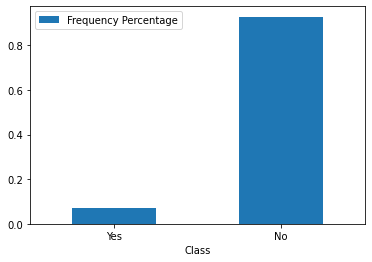

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                       0
uid                                                 0
connection.uid                                      0
connection.conn_state                               0
connection.duration                                 0
connection.orig_bytes                               0
connection.orig_ip_bytes                            0
connection.orig_p                                   0
connection.orig_pkts                                0
connection.proto                                    0
connection.resp_bytes                               0
connection.resp_ip_bytes                            0
connection.resp_p                                   0
connection.resp_pkts                                0
connection.service                                  0
connection.ts                                       0
responded_ip                                        0
dns_count                                           0
ssh_count                   

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
761    185.49.84.72   0x18c3a  CDZm3D18bZ2rdL31j3                   OTH   
19203  210.151.8.24  0x2dca8c  C50gBv385ukKLVUENk                   OTH   
20550    172.16.0.1       0xb  C8RdyE4enj2FiCDT33                    SF   
20551    172.16.0.1      0x78  CWvKZq4OBafX4wXPFj                    SF   
20552    172.16.0.1     0x137  CiDMvo2Kk5rf71N9ea                    SF   
...             ...       ...                 ...                   ...   
21563    172.16.0.1  0x2f52f5  CjdIyz1NwKw6d9YqM1                    SF   
21564    172.16.0.1  0x2f533c   CJcMDREz3B4h64aV2                    SF   
21565    172.16.0.1  0x2f53c1  Coyfuo4V6wfb6cE9rk                    SF   
21566    172.16.0.1  0x2f53d6  CXBV7F1dbwmpNxhFal                    SF   
21567    172.16.0.1  0x2f53de  ClUI403eor4v7Sikj8                    SF   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
761               0.204715                    120                       176   
19203             0.000000                      0                        68   
20550             3.230138                     51                       259   
20551             8.534509                    117                       697   
20552             9.012203                    124                       704   
...                    ...                    ...                       ...   
21563             9.358666                    126                       706   
21564             9.150828                    114                       694   
21565             8.126446                    116                       696   
21566             8.056254                    130                       710   
21567             8.876523                    122                       702   

       connection.orig_p  connection.orig_pkts connection.proto  \
761                    3                     2             icmp   
19203                  3                     1             icmp   
20550              58108                     4              tcp   
20551              58354                    11              tcp   
20552              58390                    11              tcp   
...                  ...                   ...              ...   
21563              59644                    11              tcp   
21564              59726                    11              tcp   
21565              59830                    11              tcp   
21566              59890                    11              tcp   
21567              59924                    11              tcp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
761                        0                         0                 10   
19203                      0                         0                 10   
20550                     78                       470                 21   
20551                    188                      1056                 21   
20552                    188                      1056                 21   
...                      ...                       ...                ...   
21563                    188                      1056                 21   
21564                    188                      1056                 21   
21565                    188                      1056                 21   
21566                    188                      1056                 21   
21567                    188                      1056                 21   

       connection.resp_pkts connection.service                connection.ts  \
761                       0               none  2017-07-04T13:20:20.218082Z   
19203                     0               none  2017-07-04T13:13:38.944989Z   
20550                     8                ftp  2017-07-04T13:05:02.617701Z   
20551                    17                ftp  2017-07-04T13:06:42.374814Z   
20552                    17    

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                   21568
unique                                   2104
top       2017-07-04 13:23:03.204752640+00:00
freq                                      753
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25   0x3a  CpuSQX2ibOkoBLPkWd                    SH   
1  192.168.10.25   0x50   Ceq2Csg5NwZk3NlPa                    SF   
2  192.168.10.25  0x250   CwBRdoXWJWNSTcJBe                    SF   
3  192.168.10.25  0x2ef  CHee6N2rQo3wcWLqHa                    S0   
4  192.168.10.25  0x388  COCM4i2wvD0q2WE8C4                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.000000                      0                        89   
1             0.083828                    667                      1131   
2            39.961054                   1649                      6705   
3             0.000062                    650                      1014   
4            40.024219                   1649                      6497   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              49620                     1              tcp   
1              50297                    11              tcp   
2              50275                    97              tcp   
3                137                    13              udp   
4              50360                    93              tcp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                      0                         0                443   
1                   1663                      1915                443   
2                 282261                    290589                443   
3                      0                         0                137   
4                 258795                    266707                443   

   connection.resp_pkts connection.service                connection.ts  \
0                     0               none   2017-07-04T13:05:10.09719Z   
1                     6                ssl  2017-07-04T13:16:16.943791Z   
2                   160                ssl  2017-07-04T13:12:09.069054Z   
3                     0                dns  2017-07-04T13:08:17.049633Z   
4                   152                ssl  2017-07-04T13:23:29.209443Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0  172.217.12.142          0          0           0          0            0   
1     23.111.9.15          0          0           0          1            0   
2   52.84.145.207          0          0           0          1            4   
3  192.168.10.255          1          0           0          0            0   
4   52.84.145.117          0          0           0          1            4   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3      [32]    [None]                []           []          []   
4        []        []                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []          []   
1               []              []  ['TLSv10']   
2               []              []  ['TLSv10']   
3               []              []          []   
4               []              []  ['TLSv10']   

                         ssl_cipher ssl_curve ssl_validation_status  \
0                                []        []                    []   
1  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
2  ['TLS_RSA_WITH_AES_256_CBC_SHA']    [None]                [None]   
3                                []        []                    []   
4  ['TLS_RSA_WITH_AES_256_CBC_SHA']    [None]                [None]   

  files_source                                           file_md5  \
0           []                                                 []   
1           []                                                 []   
2      ['SSL']  ['c6150925cfea5941ddc7ff2a0a50669

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip    responded_ip  connection.time  \
0  CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1   Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2   CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3  CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4  COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.000000              49620                      0   
1             0.083828              50297                    667   
2            39.961054              50275                   1649   
3             0.000062                137                    650   
4            40.024219              50360                   1649   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                        89                     1                443   
1                      1131                    11                443   
2                      6705                    97                443   
3                      1014                    13                137   
4                      6497                    93                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      0                         0                     0   
1                   1663                      1915                     6   
2                 282261                    290589                   160   
3                      0                         0                     0   
4                 258795                    266707                   152   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp               none                    SH          0   
1              tcp                ssl                    SF          0   
2              tcp                ssl                    SF          0   
3              udp                dns                    S0          1   
4              tcp                ssl                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              158   
1          0           0          1            0              246   
2          0           0          1            4              245   
3          0           0          0            0              216   
4          0           0          1            4              180   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499174e+09                           37.891050   
1                    1.499174e+09                           17.446430   
2                    1.499174e+09                           16.005865   
3                    1.499174e+09                           31.467352   
4                    1.499175e+09                           19.018989   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            50.981013                           1420.367089   
1                            13.012195                            522.939024   
2                            13.016327                            579.669388   
3                            40.393519                           1160.782407   
4                            12.444444                            451.672222   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                         153046.835443                            93.240506   
1                          19041.560976                            14.711382   
2                          19438.363265                            14.906122   
3                         116656.532407                            71.787037   
4                          20418.877778                            14.838889   

  orig_o

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip    responded_ip  connection.time  \
0  CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1   Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2   CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3  CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4  COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.000000              49620                      0   
1             0.083828              50297                    667   
2            39.961054              50275                   1649   
3             0.000062                137                    650   
4            40.024219              50360                   1649   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                        89                     1                443   
1                      1131                    11                443   
2                      6705                    97                443   
3                      1014                    13                137   
4                      6497                    93                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      0                         0                     0   
1                   1663                      1915                     6   
2                 282261                    290589                   160   
3                      0                         0                     0   
4                 258795                    266707                   152   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp               none                    SH          0   
1              tcp                ssl                    SF          0   
2              tcp                ssl                    SF          0   
3              udp                dns                    S0          1   
4              tcp                ssl                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              158   
1          0           0          1            0              246   
2          0           0          1            4              245   
3          0           0          0            0              216   
4          0           0          1            4              180   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499174e+09                           37.891050   
1                    1.499174e+09                           17.446430   
2                    1.499174e+09                           16.005865   
3                    1.499174e+09                           31.467352   
4                    1.499175e+09                           19.018989   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            50.981013                           1420.367089   
1                            13.012195                            522.939024   
2                            13.016327                            579.669388   
3                            40.393519                           1160.782407   
4                            12.444444                            451.672222   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                         153046.835443                            93.240506   
1                          19041.560976                            14.711382   
2                          19438.363265                            14.906122   
3                         116656.532407                            71.787037   
4                          20418.877778                            14.838889   

  orig_o

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000000              49620                      0   
1                 0.083828              50297                    667   
2                39.961054              50275                   1649   
3                 0.000062                137                    650   
4                40.024219              50360                   1649   
...                    ...                ...                    ...   
21563             9.358666              59644                    126   
21564             9.150828              59726                    114   
21565             8.126446              59830                    116   
21566             8.056254              59890                    130   
21567             8.876523              59924                    122   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                            89                     1                443   
1                          1131                    11                443   
2                          6705                    97                443   
3                          1014                    13                137   
4                          6497                    93                443   
...                         ...                   ...                ...   
21563                       706                    11                 21   
21564                       694                    11                 21   
21565                       696                    11                 21   
21566                       710                    11                 21   
21567                       702                    11                 21   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                       1663                      1915                     6   
2                     282261                    290589                   160   
3                          0                         0                     0   
4                     258795                    266707                   152   
...                      ...                       ...                   ...   
21563                    188                      1056                    17   
21564                    188                      1056                    17   
21565                    188                      1056                    17   
21566                    188                      1056                    17   
21567                    188                      1056                    17   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SH          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp             

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/ohe_proto_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000000              49620                      0   
1                 0.083828              50297                    667   
2                39.961054              50275                   1649   
3                 0.000062                137                    650   
4                40.024219              50360                   1649   
...                    ...                ...                    ...   
21563             9.358666              59644                    126   
21564             9.150828              59726                    114   
21565             8.126446              59830                    116   
21566             8.056254              59890                    130   
21567             8.876523              59924                    122   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                            89                     1                443   
1                          1131                    11                443   
2                          6705                    97                443   
3                          1014                    13                137   
4                          6497                    93                443   
...                         ...                   ...                ...   
21563                       706                    11                 21   
21564                       694                    11                 21   
21565                       696                    11                 21   
21566                       710                    11                 21   
21567                       702                    11                 21   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                       1663                      1915                     6   
2                     282261                    290589                   160   
3                          0                         0                     0   
4                     258795                    266707                   152   
...                      ...                       ...                   ...   
21563                    188                      1056                    17   
21564                    188                      1056                    17   
21565                    188                      1056                    17   
21566                    188                      1056                    17   
21567                    188                      1056                    17   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SH          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp             

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_gssapi,ntlm,smb',
       'connection.service_gssapi,smb,dce_rpc',
       'connection.service_gssapi,smb,krb', 'connection.service_http',
       'connection.service_krb', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntp',
       'connection.service_ssh', 'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/ohe_service_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000000              49620                      0   
1                 0.083828              50297                    667   
2                39.961054              50275                   1649   
3                 0.000062                137                    650   
4                40.024219              50360                   1649   
...                    ...                ...                    ...   
21563             9.358666              59644                    126   
21564             9.150828              59726                    114   
21565             8.126446              59830                    116   
21566             8.056254              59890                    130   
21567             8.876523              59924                    122   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                            89                     1                443   
1                          1131                    11                443   
2                          6705                    97                443   
3                          1014                    13                137   
4                          6497                    93                443   
...                         ...                   ...                ...   
21563                       706                    11                 21   
21564                       694                    11                 21   
21565                       696                    11                 21   
21566                       710                    11                 21   
21567                       702                    11                 21   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                       1663                      1915                     6   
2                     282261                    290589                   160   
3                          0                         0                     0   
4                     258795                    266707                   152   
...                      ...                       ...                   ...   
21563                    188                      1056                    17   
21564                    188                      1056                    17   
21565                    188                      1056                    17   
21566                    188                      1056                    17   
21567                    188                      1056                    17   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SH          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp             

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_S2',
       'connection.conn_state_S3', 'connection.conn_state_SF',
       'connection.conn_state_SH', 'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000000              49620                      0   
1                 0.083828              50297                    667   
2                39.961054              50275                   1649   
3                 0.000062                137                    650   
4                40.024219              50360                   1649   
...                    ...                ...                    ...   
21563             9.358666              59644                    126   
21564             9.150828              59726                    114   
21565             8.126446              59830                    116   
21566             8.056254              59890                    130   
21567             8.876523              59924                    122   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                            89                     1                443   
1                          1131                    11                443   
2                          6705                    97                443   
3                          1014                    13                137   
4                          6497                    93                443   
...                         ...                   ...                ...   
21563                       706                    11                 21   
21564                       694                    11                 21   
21565                       696                    11                 21   
21566                       710                    11                 21   
21567                       702                    11                 21   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                       1663                      1915                     6   
2                     282261                    290589                   160   
3                          0                         0                     0   
4                     258795                    266707                   152   
...                      ...                       ...                   ...   
21563                    188                      1056                    17   
21564                    188                      1056                    17   
21565                    188                      1056                    17   
21566                    188                      1056                    17   
21567                    188                      1056                    17   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SH          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp             

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dce_rpc',
       'orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_ftp',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_ssh',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_S0',
       'orig_orig_connection.conn_state_mode_SF',
       'orig_orig_connection.conn_state_mode_SH'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_icmp',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_ftp',
       'orig_resp_connection.service_mode_http',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ssh'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-',
       'orig_resp_connection.conn_state_mode_OTH',
       'orig_resp_connection.conn_state_mode_S0',
       'orig_resp_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/orig_resp_categorical_cols.txt


In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-',
       'resp_orig_connection.protocol_mode_icmp',
       'resp_orig_connection.protocol_mode_udp'],
      dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_none'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_OTH',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_icmp',
       'resp_resp_connection.protocol_mode_tcp',
       'resp_resp_connection.protocol_mode_udp'],
      dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_ftp',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.

In [32]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000000              49620                      0   
1                 0.083828              50297                    667   
2                39.961054              50275                   1649   
3                 0.000062                137                    650   
4                40.024219              50360                   1649   
...                    ...                ...                    ...   
21563             9.358666              59644                    126   
21564             9.150828              59726                    114   
21565             8.126446              59830                    116   
21566             8.056254              59890                    130   
21567             8.876523              59924                    122   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                            89                     1                443   
1                          1131                    11                443   
2                          6705                    97                443   
3                          1014                    13                137   
4                          6497                    93                443   
...                         ...                   ...                ...   
21563                       706                    11                 21   
21564                       694                    11                 21   
21565                       696                    11                 21   
21566                       710                    11                 21   
21567                       702                    11                 21   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                       1663                      1915                     6   
2                     282261                    290589                   160   
3                          0                         0                     0   
4                     258795                    266707                   152   
...                      ...                       ...                   ...   
21563                    188                      1056                    17   
21564                    188                      1056                    17   
21565                    188                      1056                    17   
21566                    188                      1056                    17   
21567                    188                      1056                    17   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SH          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp             

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp', 'orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dce_rpc', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_ftp', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ntp', 'orig_orig_connection.service_mode_ssh', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_S0', 'orig_orig_connection.conn_state_mode_SF', 'orig_orig_connection.conn_state_mode_SH']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_icmp', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_ftp', 'orig_resp_connection.service_mode_http', 'orig_resp_connection.serv

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     2.156800e+04         21568.000000       21568.000000   
mean      1.499174e+09            16.625164       48116.659913   
std       5.281106e+02            51.773732       17829.158164   
min       1.499174e+09             0.000000           3.000000   
25%       1.499174e+09             0.023402       45165.000000   
50%       1.499174e+09             0.061055       53657.500000   
75%       1.499175e+09             5.425416       60555.000000   
max       1.499175e+09          1790.893092       65531.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           21568.000000              21568.000000          21568.000000   
mean              654.080072               1088.499351              9.332205   
std              8158.289660               9324.340378             59.665364   
min                 0.000000                  0.000000              0.000000   
25%                57.000000                106.000000              2.000000   
50%                80.000000                140.000000              2.000000   
75%               345.250000                708.000000             10.000000   
max            831950.000000             847675.000000           4606.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       21568.000000           2.156800e+04              2.156800e+04   
mean          191.951827           9.971820e+03              1.050965e+04   
std          1344.487746           1.653414e+05              1.703027e+05   
min            10.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.170000e+02              1.640000e+02   
50%            53.000000           1.900000e+02              2.660000e+02   
75%           123.000000           4.980000e+02              1.056000e+03   
max         58362.000000           1.332175e+07              1.373749e+07   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          21568.000000  21568.000000  21568.000000  21568.000000   
mean              11.013770      0.613872      0.003616      0.054201   
std              101.186268      0.486872      0.060030      0.226418   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      0.000000      0.000000      0.000000   
50%                2.000000      1.000000      0.000000      0.000000   
75%                8.000000      1.000000      0.000000      0.000000   
max             7995.000000      1.000000      1.000000      1.000000   

          ssl_count   files_count  orig_orig_total  \
count  21568.000000  21568.000000     21568.000000   
mean       0.190467      0.444733       929.470605   
std        0.392679      1.234316       570.957088   
min        0.000000      0.000000         1.000000   
25%        0.000000      0.000000       473.000000   
50%        0.000000      0.000000       743.000000   
75%        0.000000      0.000000      1421.000000   
max        1.000000     27.000000      2137.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    2.156800e+04                        21568.000000   
mean                     1.499174e+09                           16.423593   
std                      5.034008e+02                           10.288431   
min                      1.499174e+09                            0.000000   
25%                      1.499174e+09                            8.916946   
50%                      1.499174e+09                           19.548448   
75%                      1.499175e+09                           24.064088   
max                      1.499175e+09                           76.140538   

       orig_orig_connection.orig_pkts_mean  \
count                         21568.000000   
mean                              9.249755   
std                 

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.222352          0.144664        -1.474797   
1               0.222352         -2.655924        -0.212065   
2               0.222352         -2.114292        -0.681438   
3               0.222352          0.515952        -1.120786   
4               0.222352         -2.114292         0.606467   
...                  ...               ...              ...   
21563          -4.490896          0.515952        -0.182685   
21564          -4.490896          0.515952        -0.114280   
21565          -4.490896          0.515952        -0.028010   
21566          -4.490896          0.515952         0.020114   
21567          -4.490896          0.515952         0.046972   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                -0.321119           0.084321              -0.080176   
1                -0.319500           0.122294               0.001584   
2                 0.450739           0.121060               0.121955   
3                -0.321118          -2.691141              -0.000500   
4                 0.451959           0.125827               0.121955   
...                    ...                ...                    ...   
21563            -0.140354           0.646559              -0.064731   
21564            -0.144369           0.651159              -0.066202   
21565            -0.164155           0.656992              -0.065957   
21566            -0.165511           0.660357              -0.064240   
21567            -0.149667           0.662264              -0.065221   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                     -0.107195             -0.139652           0.186728   
1                      0.004558              0.027953           0.186728   
2                      0.602362              1.469359           0.186728   
3                     -0.007990              0.061474          -0.040873   
4                      0.580055              1.402317           0.186728   
...                         ...                   ...                ...   
21563                 -0.041023              0.027953          -0.127153   
21564                 -0.042310              0.027953          -0.127153   
21565                 -0.042095              0.027953          -0.127153   
21566                 -0.040594              0.027953          -0.127153   
21567                 -0.041452              0.027953          -0.127153   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  -0.060312                 -0.061713             -0.108849   
1                  -0.050254                 -0.050468             -0.049551   
2                   1.646869                  1.644636              1.472430   
3                  -0.060312                 -0.061713             -0.108849   
4                   1.504941                  1.504400              1.393366   
...                      ...                       ...                   ...   
21563              -0.059175                 -0.055512              0.059162   
21564              -0.059175                 -0.055512              0.059162   
21565              -0.059175                 -0.055512              0.059162   
21566              -0.059175                 -0.055512              0.059162   
21567              -0.059175                 -0.055512              0.059162   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.260880  -0.060246   -0.239388  -0.485057    -0.360315   
1      -1.260880  -0.060246   -0.239388   2.061612    -0.360315   
2      -1.260880  -0.060246   -0.239388   2.061612     2.880420   
3       0.793097  -0.060246   -0.239388  -0.485057    -0.360315   
4      -1.260880  -0.060246   -0.239388   2.061612     2.880420   
...          ...        ...         ...        ...          ...   
21563  -1.260880  -0.060246   -0.239388  -

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2             3         4         5    \
0      0.534525  0.770613  0.005610  0.000000e+00  0.757188  0.000000   
1      0.534525  0.100580  0.376160  4.680793e-05  0.767519  0.000802   
2      0.534525  0.230164  0.238422  2.231348e-02  0.767183  0.001982   
3      0.534525  0.859443  0.109495  3.461960e-08  0.002045  0.000781   
4      0.534525  0.230164  0.616360  2.234875e-02  0.768481  0.001982   
...         ...       ...       ...           ...       ...       ...   
21563  0.000000  0.859443  0.384782  5.225698e-03  0.910161  0.000151   
21564  0.000000  0.859443  0.404856  5.109645e-03  0.911412  0.000137   
21565  0.000000  0.859443  0.430172  4.537650e-03  0.912999  0.000139   
21566  0.000000  0.859443  0.444294  4.498456e-03  0.913915  0.000156   
21567  0.000000  0.859443  0.452175  4.956478e-03  0.914434  0.000147   

            6         7         8         9         10        11   12   13   \
0      0.000105  0.000217  0.007420  0.000000  0.000000  0.000000  0.0  0.0   
1      0.001334  0.002388  0.007420  0.000125  0.000139  0.000750  0.0  0.0   
2      0.007910  0.021059  0.007420  0.021188  0.021153  0.020013  0.0  0.0   
3      0.001196  0.002822  0.002176  0.000000  0.000000  0.000000  1.0  0.0   
4      0.007664  0.020191  0.007420  0.019427  0.019415  0.019012  0.0  0.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
21563  0.000833  0.002388  0.000189  0.000014  0.000077  0.002126  0.0  0.0   
21564  0.000819  0.002388  0.000189  0.000014  0.000077  0.002126  0.0  0.0   
21565  0.000821  0.002388  0.000189  0.000014  0.000077  0.002126  0.0  0.0   
21566  0.000838  0.002388  0.000189  0.000014  0.000077  0.002126  0.0  0.0   
21567  0.000828  0.002388  0.000189  0.000014  0.000077  0.002126  0.0  0.0   

       14   15        16        17        18        19        20        21   \
0      0.0  0.0  0.000000  0.073502  0.056336  0.497646  0.873994  0.459136   
1      0.0  1.0  0.000000  0.114700  0.370998  0.229135  0.210051  0.169041   
2      0.0  1.0  0.148148  0.114232  0.246714  0.210215  0.210124  0.187379   
3      0.0  0.0  0.000000  0.100655  0.098387  0.413280  0.688855  0.375225   
4      0.0  1.0  0.148148  0.083801  0.604268  0.249788  0.200123  0.146004   
...    ...  ...       ...       ...       ...       ...       ...       ...   
21563  0.0  0.0  0.000000  0.269663  0.356815  0.116932  0.174411  0.038809   
21564  0.0  0.0  0.000000  0.250936  0.367363  0.116858  0.174377  0.038829   
21565  0.0  0.0  0.000000  0.227528  0.380543  0.116812  0.174327  0.038906   
21566  0.0  0.0  0.000000  0.213483  0.388449  0.116863  0.174291  0.038937   
21567  0.0  0.0  0.000000  0.207397  0.391881  0.116840  0.174274  0.038946   

            22        23        24        25        26   27        28   \
0      0.995491  0.996064  0.067961  0.070759  0.000000  0.0  0.014058   
1      0.123856  0.157158  0.145631  0.108247  0.000000  0.0  0.020150   
2      0.126437  0.159238  0.135922  0.108247  0.000000  0.0  0.021556   
3      0.758791  0.766882  0.097087  0.096532  0.000000  0.0  0.019213   
4      0.132814  0.158520  0.135922  0.077788  0.000000  0.0  0.013590   
...         ...       ...       ...       ...       ...  ...       ...   
21563  0.001220  0.180996  0.000000  0.270384  0.861194  0.0  0.000000   
21564  0.001219  0.180950  0.000000  0.251640  0.801493  0.0  0.000000   
21565  0.001219  0.180883  0.000000  0.228210  0.726866  0.0  0.000000   
21566  0.001219  0.180835  0.000000  0.214152  0.682090  0.0  0.000000   
21567  0.001219  0.180813  0.000000  0.208060  0.662687  0.0  0.000000   

            29        30        31   32        33        34   35        36   \
0      0.011811  0.040816  0.149718  0.0  0.521739  0.333333  0.0  0.227848   
1      0.000000  0.102041  0.234463  0.0  0.956522  0.555556  0.0  0.223577   
2      0.007874  0.091837  0.234463  0.0  0.782609  0.444444  0.0  0.228571   
3      0.011811  0.071429  0.204

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.534525          0.770613         0.005610   
1               0.534525          0.100580         0.376160   
2               0.534525          0.230164         0.238422   
3               0.534525          0.859443         0.109495   
4               0.534525          0.230164         0.616360   
...                  ...               ...              ...   
21563           0.000000          0.859443         0.384782   
21564           0.000000          0.859443         0.404856   
21565           0.000000          0.859443         0.430172   
21566           0.000000          0.859443         0.444294   
21567           0.000000          0.859443         0.452175   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.000000e+00           0.757188               0.000000   
1             4.680793e-05           0.767519               0.000802   
2             2.231348e-02           0.767183               0.001982   
3             3.461960e-08           0.002045               0.000781   
4             2.234875e-02           0.768481               0.001982   
...                    ...                ...                    ...   
21563         5.225698e-03           0.910161               0.000151   
21564         5.109645e-03           0.911412               0.000137   
21565         4.537650e-03           0.912999               0.000139   
21566         4.498456e-03           0.913915               0.000156   
21567         4.956478e-03           0.914434               0.000147   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000105              0.000217           0.007420   
1                      0.001334              0.002388           0.007420   
2                      0.007910              0.021059           0.007420   
3                      0.001196              0.002822           0.002176   
4                      0.007664              0.020191           0.007420   
...                         ...                   ...                ...   
21563                  0.000833              0.002388           0.000189   
21564                  0.000819              0.002388           0.000189   
21565                  0.000821              0.002388           0.000189   
21566                  0.000838              0.002388           0.000189   
21567                  0.000828              0.002388           0.000189   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000                  0.000000              0.000000   
1                   0.000125                  0.000139              0.000750   
2                   0.021188                  0.021153              0.020013   
3                   0.000000                  0.000000              0.000000   
4                   0.019427                  0.019415              0.019012   
...                      ...                       ...                   ...   
21563               0.000014                  0.000077              0.002126   
21564               0.000014                  0.000077              0.002126   
21565               0.000014                  0.000077              0.002126   
21566               0.000014                  0.000077              0.002126   
21567               0.000014                  0.000077              0.002126   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        1.0     0.000000   
2            0.0        0.0         0.0        1.0     0.148148   
3            1.0        0.0         0.0        0.0     0.000000   
4            0.0        0.0         0.0        1.0     0.148148   
...          ...        ...         ...        ...          ...   
21563        0.0        0.0         0.0   

In [41]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000000              49620                      0   
1                 0.083828              50297                    667   
2                39.961054              50275                   1649   
3                 0.000062                137                    650   
4                40.024219              50360                   1649   
...                    ...                ...                    ...   
21563             9.358666              59644                    126   
21564             9.150828              59726                    114   
21565             8.126446              59830                    116   
21566             8.056254              59890                    130   
21567             8.876523              59924                    122   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                            89                     1                443   
1                          1131                    11                443   
2                          6705                    97                443   
3                          1014                    13                137   
4                          6497                    93                443   
...                         ...                   ...                ...   
21563                       706                    11                 21   
21564                       694                    11                 21   
21565                       696                    11                 21   
21566                       710                    11                 21   
21567                       702                    11                 21   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                       1663                      1915                     6   
2                     282261                    290589                   160   
3                          0                         0                     0   
4                     258795                    266707                   152   
...                      ...                       ...                   ...   
21563                    188                      1056                    17   
21564                    188                      1056                    17   
21565                    188                      1056                    17   
21566                    188                      1056                    17   
21567                    188                      1056                    17   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SH          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp             

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               0                           1   
4                               1                           0   
...                           ...                         ...   
21563                           1                           0   
21564                           1                           0   
21565                           1                           0   
21566                           1                           0   
21567                           1                           0   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
21563                    0                   1                   0   
21564                    0                   1                   0   
21565                    0                   1                   0   
21566                    0                   1                   0   
21567                    0                   1                   0   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        1                   0                   0   
1                        1                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        1                   0                   0   
...                    ...                 ...                 ...   
21563                    0                   0                   0   
21564                    0                   0                   0   
21565                    0                   0                   0   
21566                    0                   0                   0   
21567                    0                   0                   0   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           0   
1                        0                    0                           0   
2                        0                    0                           0   
3                        0                    0                           1   
4                        0                    0                           0   
...                    ...                  ...                         ...   
21563                    0                    0                           0   
21564                    0                    0                           0   
21565                    0                    0                           0   
21566                    0                    0                           0   
21567                    0                    0                           0   

       connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                          0                     1                     0   
1                          0                     1                     0   
2                          0                     1                     0   
3                          0                     0                     1   
4                          0                     1                     0   
...                      ...                   ...                   ...   
21563                      0                     1             

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip    responded_ip  connection.time  \
0      CpuSQX2ibOkoBLPkWd  192.168.10.25  172.217.12.142     1.499174e+09   
1       Ceq2Csg5NwZk3NlPa  192.168.10.25     23.111.9.15     1.499174e+09   
2       CwBRdoXWJWNSTcJBe  192.168.10.25   52.84.145.207     1.499174e+09   
3      CHee6N2rQo3wcWLqHa  192.168.10.25  192.168.10.255     1.499174e+09   
4      COCM4i2wvD0q2WE8C4  192.168.10.25   52.84.145.117     1.499175e+09   
...                   ...            ...             ...              ...   
21563  CjdIyz1NwKw6d9YqM1     172.16.0.1   192.168.10.50     1.499174e+09   
21564   CJcMDREz3B4h64aV2     172.16.0.1   192.168.10.50     1.499174e+09   
21565  Coyfuo4V6wfb6cE9rk     172.16.0.1   192.168.10.50     1.499174e+09   
21566  CXBV7F1dbwmpNxhFal     172.16.0.1   192.168.10.50     1.499174e+09   
21567  ClUI403eor4v7Sikj8     172.16.0.1   192.168.10.50     1.499174e+09   

        duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0       0.000000   49620        0          89                     1     443   
1       0.083828   50297      667        1131                    11     443   
2      39.961054   50275     1649        6705                    97     443   
3       0.000062     137      650        1014                    13     137   
4      40.024219   50360     1649        6497                    93     443   
...          ...     ...      ...         ...                   ...     ...   
21563   9.358666   59644      126         706                    11      21   
21564   9.150828   59726      114         694                    11      21   
21565   8.126446   59830      116         696                    11      21   
21566   8.056254   59890      130         710                    11      21   
21567   8.876523   59924      122         702                    11      21   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol service conn_state  \
0            0           0                     0      tcp    none         SH   
1         1663        1915                     6      tcp     ssl         SF   
2       282261      290589                   160      tcp     ssl         SF   
3            0           0                     0      udp     dns         S0   
4       258795      266707                   152      tcp     ssl         SF   
...        ...         ...                   ...      ...     ...        ...   
21563      188        1056                    17      tcp     ftp         SF   
21564      188        1056                    17      tcp     ftp         SF   
21565      188        1056                    17      tcp     ftp         SF   
21566      188        1056                    17      tcp     ftp         SF   
21567      188        1056                    17      tcp     ftp         SF   

            orig_p_cat       resp_p_cat attacker_label victim_label  \
0      orig_reg_or_dyn         resp_443             No           No   
1      orig_reg_or_dyn         resp_443             No           No   
2      orig_reg_or_dyn         resp_443             No           No   
3      orig_well_known  resp_well_known             No           No   
4      orig_reg_or_dyn         resp_443             No           No   
...                ...              ...            ...          ...   
21563  orig_reg_or_dyn          resp_21            Yes          Yes   
21564  orig_reg_or_dyn          resp_21            Yes          Yes   
21565  orig_reg_or_dyn          resp_21            Yes          Yes   
21566  orig_reg_or_dyn          resp_21            Yes          Yes   
21567  orig_reg_or_dyn          resp_21            Yes          Yes   

                         timestamp  
0       2017-07-04T13:05:10.09719Z  
1      2017-07-04T13:16:16.943791Z  
2      2017-07-04T13:12:09.069054Z  
3      2017-07-04T13:08:17.049633Z  
4      2017-07-04T13:23:29.209443Z  
...                            ...  
21563  2017-07-04T13:16:32.459544Z  
21564  2017-07-04T13:17:08.583971Z  
2

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0               0.534525          0.770613         0.005610   
1               0.534525          0.100580         0.376160   
2               0.534525          0.230164         0.238422   
3               0.534525          0.859443         0.109495   
4               0.534525          0.230164         0.616360   
...                  ...               ...              ...   
21563           0.000000          0.859443         0.384782   
21564           0.000000          0.859443         0.404856   
21565           0.000000          0.859443         0.430172   
21566           0.000000          0.859443         0.444294   
21567           0.000000          0.859443         0.452175   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.000000e+00           0.757188               0.000000   
1             4.680793e-05           0.767519               0.000802   
2             2.231348e-02           0.767183               0.001982   
3             3.461960e-08           0.002045               0.000781   
4             2.234875e-02           0.768481               0.001982   
...                    ...                ...                    ...   
21563         5.225698e-03           0.910161               0.000151   
21564         5.109645e-03           0.911412               0.000137   
21565         4.537650e-03           0.912999               0.000139   
21566         4.498456e-03           0.913915               0.000156   
21567         4.956478e-03           0.914434               0.000147   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000105              0.000217           0.007420   
1                      0.001334              0.002388           0.007420   
2                      0.007910              0.021059           0.007420   
3                      0.001196              0.002822           0.002176   
4                      0.007664              0.020191           0.007420   
...                         ...                   ...                ...   
21563                  0.000833              0.002388           0.000189   
21564                  0.000819              0.002388           0.000189   
21565                  0.000821              0.002388           0.000189   
21566                  0.000838              0.002388           0.000189   
21567                  0.000828              0.002388           0.000189   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000                  0.000000              0.000000   
1                   0.000125                  0.000139              0.000750   
2                   0.021188                  0.021153              0.020013   
3                   0.000000                  0.000000              0.000000   
4                   0.019427                  0.019415              0.019012   
...                      ...                       ...                   ...   
21563               0.000014                  0.000077              0.002126   
21564               0.000014                  0.000077              0.002126   
21565               0.000014                  0.000077              0.002126   
21566               0.000014                  0.000077              0.002126   
21567               0.000014                  0.000077              0.002126   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        1.0     0.000000   
2            0.0        0.0         0.0        1.0     0.148148   
3            1.0        0.0         0.0        0.0     0.000000   
4            0.0        0.0         0.0        1.0     0.148148   
...          ...        ...         ...        ...          ...   
21563        0.0        0.0         0.0   

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/preprocessed_backup_14_11.csv


## 4. Check correlations of so far selected features

In [53]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

# correlationMatrix = pd.DataFrame(data=[],index=result_numerical.columns, columns=result_numerical.columns)
# for i in result_numerical.columns:
#   for j in result_numerical.columns:
#     correlationMatrix.loc[i,j] = np.round(pearsonr(result_numerical.loc[:,i], result_numerical.loc[:,j])[0],2)
# correlationMatrix

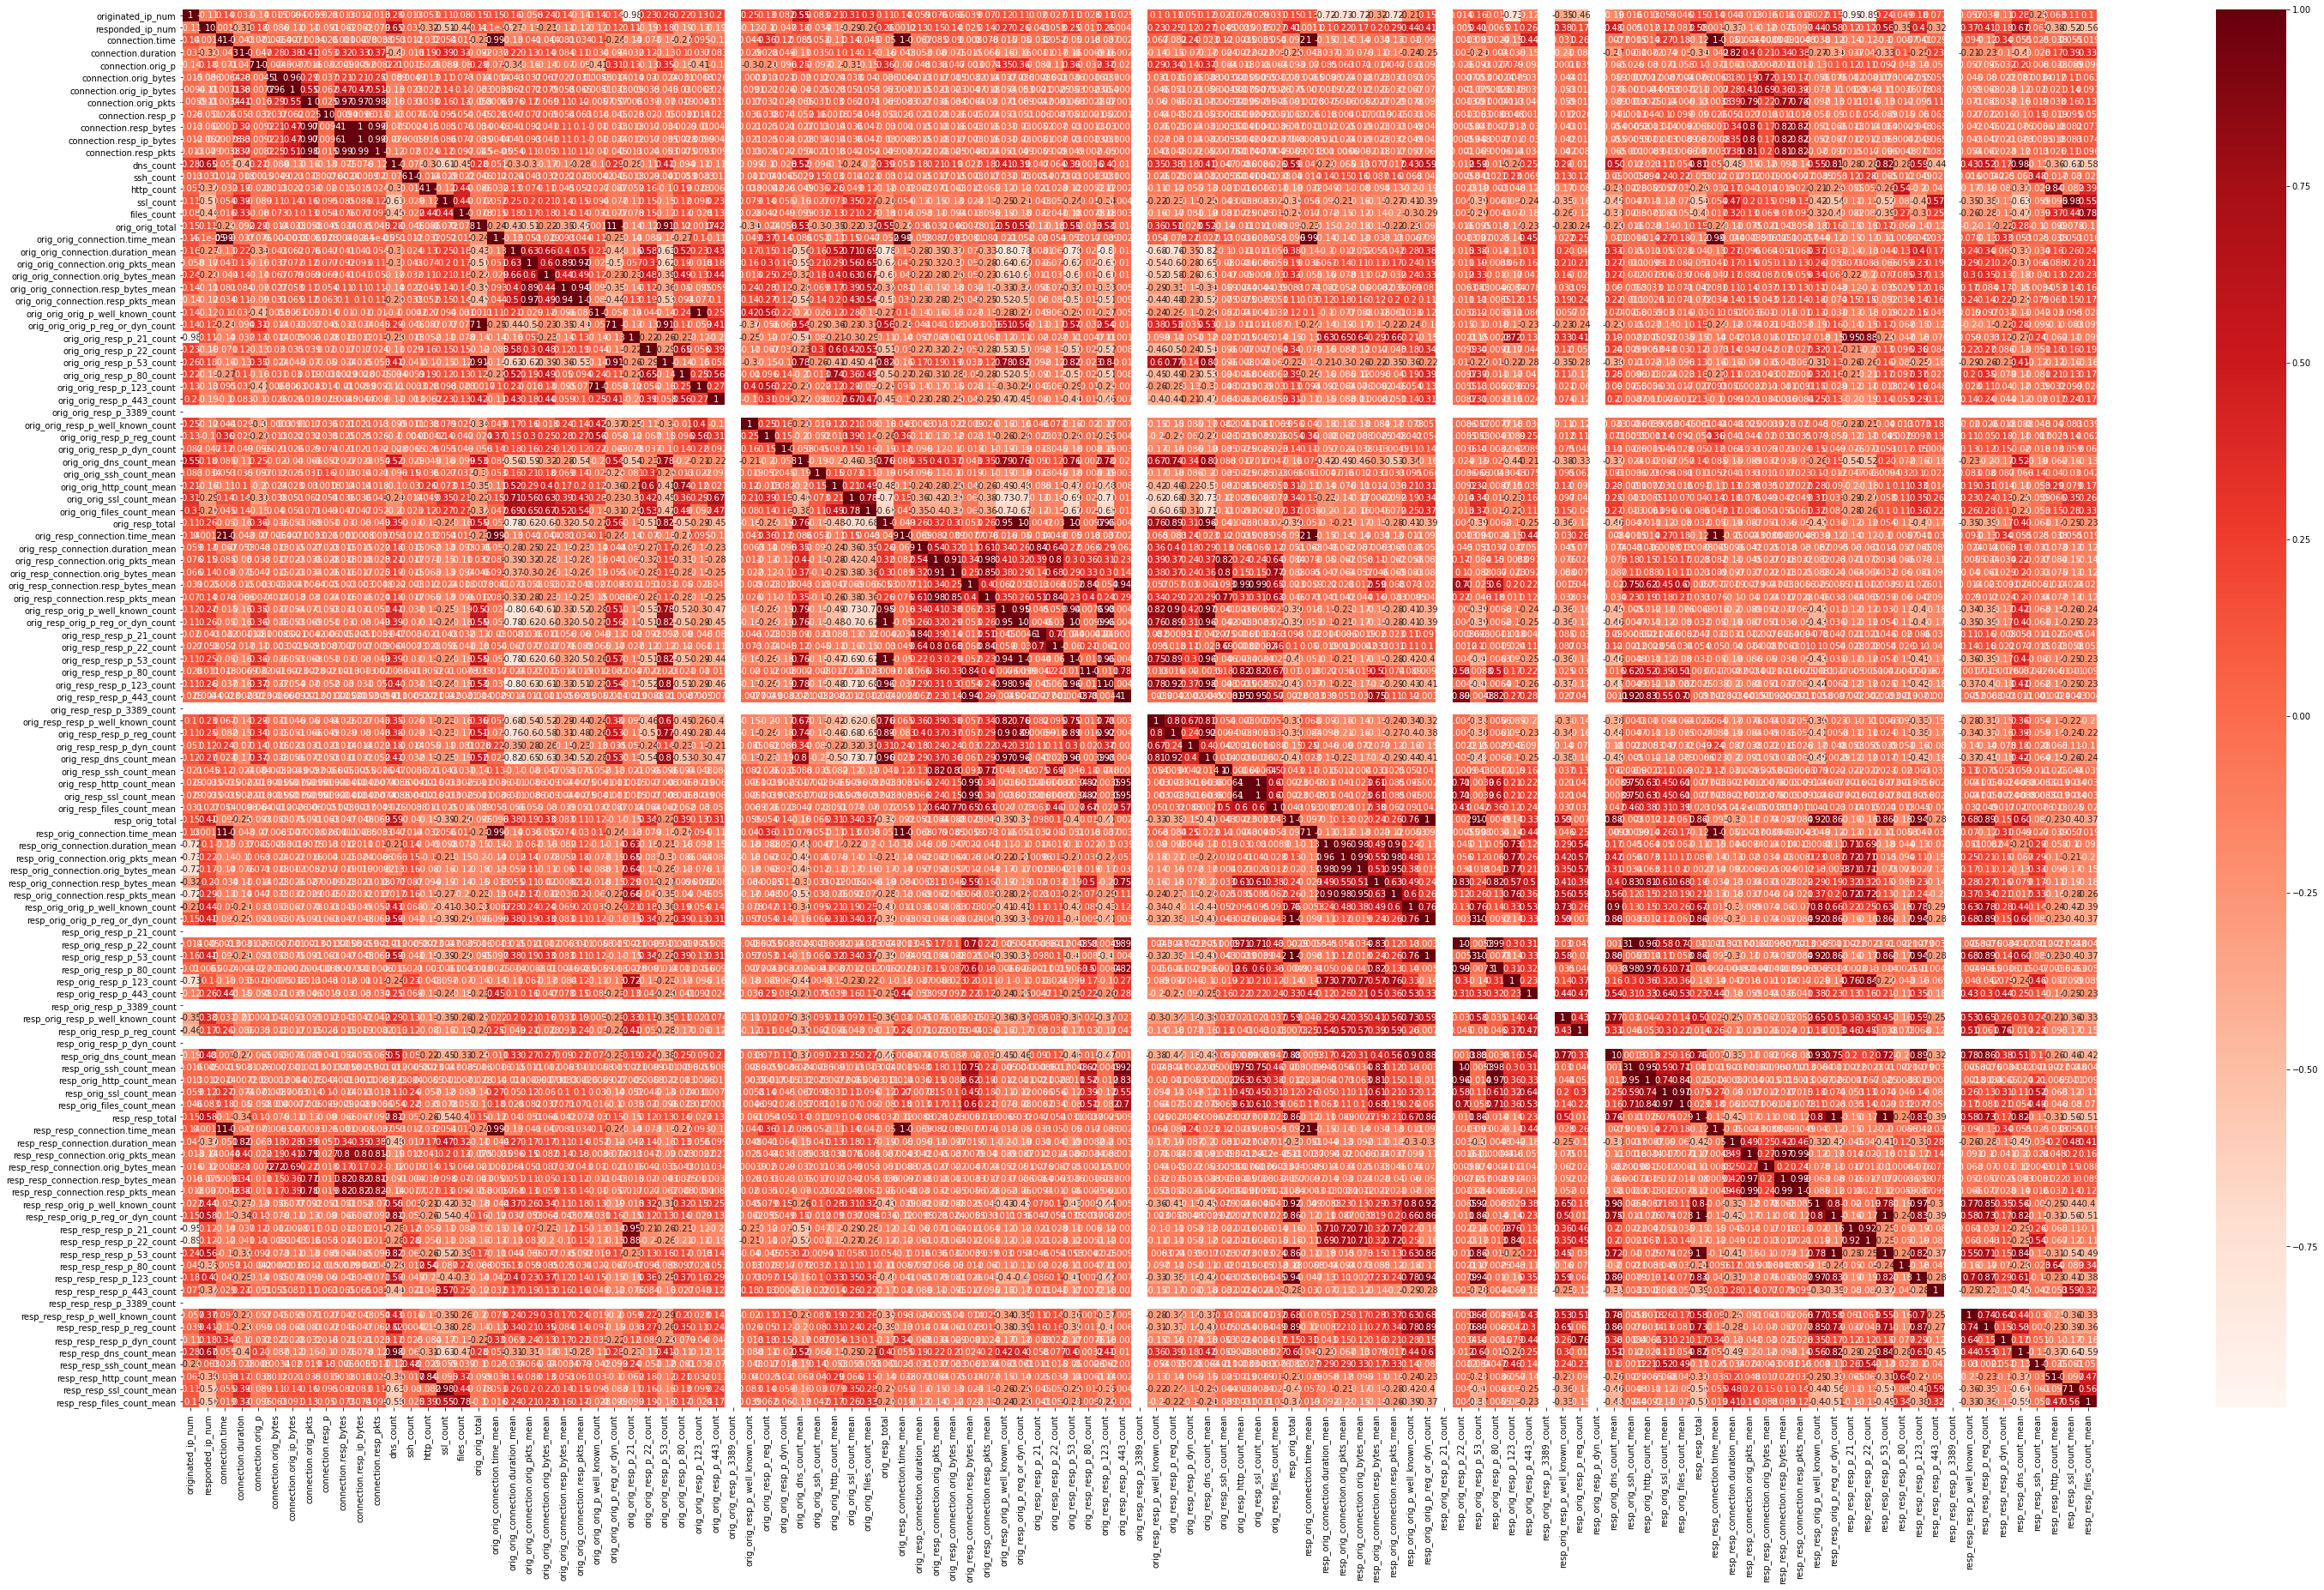

In [52]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0               0.534525          0.770613         0.005610   
1               0.534525          0.100580         0.376160   
2               0.534525          0.230164         0.238422   
3               0.534525          0.859443         0.109495   
4               0.534525          0.230164         0.616360   
...                  ...               ...              ...   
21563           0.000000          0.859443         0.384782   
21564           0.000000          0.859443         0.404856   
21565           0.000000          0.859443         0.430172   
21566           0.000000          0.859443         0.444294   
21567           0.000000          0.859443         0.452175   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.000000e+00           0.757188               0.000000   
1             4.680793e-05           0.767519               0.000802   
2             2.231348e-02           0.767183               0.001982   
3             3.461960e-08           0.002045               0.000781   
4             2.234875e-02           0.768481               0.001982   
...                    ...                ...                    ...   
21563         5.225698e-03           0.910161               0.000151   
21564         5.109645e-03           0.911412               0.000137   
21565         4.537650e-03           0.912999               0.000139   
21566         4.498456e-03           0.913915               0.000156   
21567         4.956478e-03           0.914434               0.000147   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000105              0.000217           0.007420   
1                      0.001334              0.002388           0.007420   
2                      0.007910              0.021059           0.007420   
3                      0.001196              0.002822           0.002176   
4                      0.007664              0.020191           0.007420   
...                         ...                   ...                ...   
21563                  0.000833              0.002388           0.000189   
21564                  0.000819              0.002388           0.000189   
21565                  0.000821              0.002388           0.000189   
21566                  0.000838              0.002388           0.000189   
21567                  0.000828              0.002388           0.000189   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000                  0.000000              0.000000   
1                   0.000125                  0.000139              0.000750   
2                   0.021188                  0.021153              0.020013   
3                   0.000000                  0.000000              0.000000   
4                   0.019427                  0.019415              0.019012   
...                      ...                       ...                   ...   
21563               0.000014                  0.000077              0.002126   
21564               0.000014                  0.000077              0.002126   
21565               0.000014                  0.000077              0.002126   
21566               0.000014                  0.000077              0.002126   
21567               0.000014                  0.000077              0.002126   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        1.0     0.000000   
2            0.0        0.0         0.0        1.0     0.148148   
3            1.0        0.0         0.0        0.0     0.000000   
4            0.0        0.0         0.0        1.0     0.148148   
...          ...        ...         ...        ...          ...   
21563        0.0        0.0         0.0   

In [50]:
for col in result_final.columns:
    print(col)

originated_ip_num
responded_ip_num
connection.time
connection.duration
connection.orig_p
connection.orig_bytes
connection.orig_ip_bytes
connection.orig_pkts
connection.resp_p
connection.resp_bytes
connection.resp_ip_bytes
connection.resp_pkts
dns_count
ssh_count
http_count
ssl_count
files_count
orig_orig_total
orig_orig_connection.time_mean
orig_orig_connection.duration_mean
orig_orig_connection.orig_pkts_mean
orig_orig_connection.orig_bytes_mean
orig_orig_connection.resp_bytes_mean
orig_orig_connection.resp_pkts_mean
orig_orig_orig_p_well_known_count
orig_orig_orig_p_reg_or_dyn_count
orig_orig_resp_p_21_count
orig_orig_resp_p_22_count
orig_orig_resp_p_53_count
orig_orig_resp_p_80_count
orig_orig_resp_p_123_count
orig_orig_resp_p_443_count
orig_orig_resp_p_3389_count
orig_orig_resp_p_well_known_count
orig_orig_resp_p_reg_count
orig_orig_resp_p_dyn_count
orig_orig_dns_count_mean
orig_orig_ssh_count_mean
orig_orig_http_count_mean
orig_orig_ssl_count_mean
orig_orig_files_count_mean
orig_o

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)